# 1. Load the dataset

In [159]:
import tqdm
import gdown
import zipfile

# Load the dataset from the local folder
dataset_url = 'https://drive.google.com/file/d/1qjVfiihN_MNdrOJXZIaS_JQ8JzO5pxfM/view?usp=sharing'
gdown.download(dataset_url, output='data.zip', quiet=False, fuzzy=True)

# extract the dataset from the zip file
with zipfile.ZipFile("data.zip","r") as zf:
    for member in tqdm.tqdm(zf.infolist(), desc='Extracting '):
        try:
            zf.extract(member, 'data')
        except zipfile.error as e:
            pass
print('Importing dataset completed')

Downloading...
From (uriginal): https://drive.google.com/uc?id=1qjVfiihN_MNdrOJXZIaS_JQ8JzO5pxfM
From (redirected): https://drive.google.com/uc?id=1qjVfiihN_MNdrOJXZIaS_JQ8JzO5pxfM&confirm=t&uuid=4ff2de19-4dd0-4e23-8367-8369a80fc151
To: C:\Users\jonat\PycharmProjects\ML-Final-Project\data.zip
100%|██████████| 583M/583M [02:08<00:00, 4.55MB/s] 
Extracting : 100%|██████████| 3770/3770 [00:03<00:00, 1108.23it/s]

Importing dataset completed


In [191]:
import pathlib

# Count the number of images in the dataset
data_dir = pathlib.Path('./data')
image_count = len(list(data_dir.glob('*/*.jpg')))
print(f"The dataset contains {image_count} images")

The dataset contains 3770 images


In [192]:
# divide the dataset into 5 categories
categories = ['beauty', 'family', 'fashion', 'fitness', 'food']
label2id_dict = dict((name, index) for index, name in enumerate(categories))
id2label_dict = dict((index, name) for index, name in enumerate(categories))
print('The categories are: ', categories)
dataset = []
for category in categories:
    dataset.append(list(data_dir.glob(category+'/*.jpg')))
    print(f"{category} images: {len(list(data_dir.glob(category+'/*.jpg')))}")

The categories are:  ['beauty', 'family', 'fashion', 'fitness', 'food']
beauty images: 754
family images: 754
fashion images: 754
fitness images: 754
food images: 754


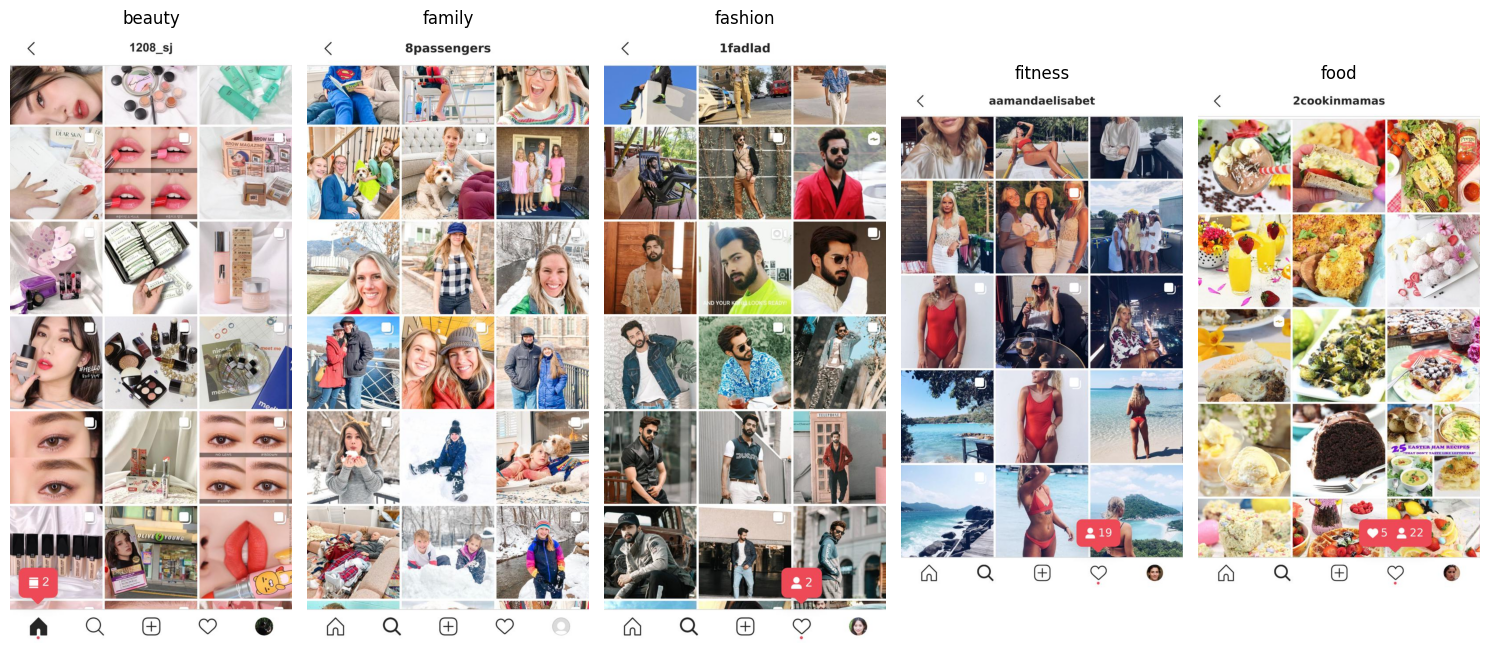

In [162]:
# plot one image per category
import matplotlib.pyplot as plt
import PIL

plt.figure(figsize=(15, 15))
for index, category in enumerate(categories):
    img = dataset[index][0]
    plt.subplot(1, 5, index+1)
    plt.imshow(PIL.Image.open(str(img)))
    plt.title(category)
    plt.axis('off')

plt.tight_layout()
plt.show()

# 2. Process the data

In [208]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# 80% of the images are used for training, 20% for testing
dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical',
    labels='inferred',
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(224, 224),
  batch_size=32,
  shuffle=True
)

Found 3770 files belonging to 5 classes.
Using 3016 files for training.
Found 3770 files belonging to 5 classes.
Using 754 files for validation.
